## 766. 托普利茨矩阵 - Graphics / 2D Arrays / Code simplify
给你一个 m x n 的矩阵 matrix 。如果这个矩阵是托普利茨矩阵，返回 true ；否则，返回 false 。

如果矩阵上**每一条**由左上到右下的对角线上的元素都相同 （注意是每一条，而不仅仅是主对角线），那么这个矩阵是 托普利茨矩阵 。

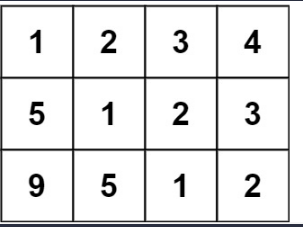
示例 1：

```
输入：matrix = [[1,2,3,4],[5,1,2,3],[9,5,1,2]]
输出：true
解释：
在上述矩阵中, 其对角线为: 
"[9]", "[5, 5]", "[1, 1, 1]", "[2, 2, 2]", "[3, 3]", "[4]"。 
各条对角线上的所有元素均相同, 因此答案是 True 。
```

提示：
```
m == matrix.length
n == matrix[i].length
1 <= m, n <= 20
0 <= matrix[i][j] <= 99
 ```

进阶：

如果矩阵存储在磁盘上，并且内存有限，以至于一次最多只能将矩阵的一行加载到内存中，该怎么办？
如果矩阵太大，以至于一次只能将不完整的一行加载到内存中，该怎么办？


In [1]:
from typing import List

class Solution:
    def isToeplitzMatrix(self, m: List[List[int]]) -> bool:
        '''
        zip(m[:-1], m[1:]): 生成一系列的tuple，every tuple is composed as
        (i-th row in matrix, (i+1)-th row in matrix)  
        '''
        for r1, r2 in zip(m[:-1], m[1:]):
            if r1[:-1] != r2[1:]:
                return False
        return True

In [2]:
ss = Solution()
matrix1 = [[1,2,3,4],[5,1,2,3],[9,5,1,2]]
matrix2 = [[1,2],[2,2]]
matrix3 = [[11,74,0,93],[40,11,74,7]]
matrix4 = [[65,98,57]]
matrix5 = [[11,74,7,93],[40,11,74,7]]
matrix6 = [[36,59,71,15,26,82,87],[56,36,59,71,15,26,82],[15,0,36,59,71,15,26]]

def test(matrix):
    print(matrix, ss.isToeplitzMatrix(matrix))
"""
test(matrix1)
test(matrix2)
test(matrix4)
"""
test(matrix3)
test(matrix5)
test(matrix6)

[[11, 74, 0, 93], [40, 11, 74, 7]] False
[[11, 74, 7, 93], [40, 11, 74, 7]] True
[[36, 59, 71, 15, 26, 82, 87], [56, 36, 59, 71, 15, 26, 82], [15, 0, 36, 59, 71, 15, 26]] False


## 832. 翻转图像 - Graphics / 2D Arrays 

给定一个二进制矩阵 A，我们想先水平翻转图像，然后反转图像并返回结果。

水平翻转图片就是将图片的每一行都进行翻转，即逆序。例如，水平翻转 [1, 1, 0] 的结果是 [0, 1, 1]。

反转图片的意思是图片中的 0 全部被 1 替换， 1 全部被 0 替换。例如，反转 [0, 1, 1] 的结果是 [1, 0, 0]。

示例 1：

```
输入：[[1,1,0],[1,0,1],[0,0,0]]
输出：[[1,0,0],[0,1,0],[1,1,1]]
解释：首先翻转每一行: [[0,1,1],[1,0,1],[0,0,0]]；
     然后反转图片: [[1,0,0],[0,1,0],[1,1,1]]
```

示例 2：

```
输入：[[1,1,0,0],[1,0,0,1],[0,1,1,1],[1,0,1,0]]
输出：[[1,1,0,0],[0,1,1,0],[0,0,0,1],[1,0,1,0]]
解释：首先翻转每一行: [[0,0,1,1],[1,0,0,1],[1,1,1,0],[0,1,0,1]]；
```

提示：
```
1 <= A.length = A[0].length <= 20
0 <= A[i][j] <= 1
```

In [23]:
from typing import List

class Solution:
    def flipAndInvertImage(self, A: List[List[int]]) -> List[List[int]]:
        row_num, col_num = len(A), len(A[0])
        for i in range(row_num):
            for j in range(col_num//2):
                A[i][j], A[i][col_num-j-1] = A[i][col_num-j-1], A[i][j]
                A[i][j], A[i][col_num-j-1] = abs(A[i][j]-1), abs(A[i][col_num-j-1]-1)
                if (col_num//2) % 2 != 0:
                    A[i][col_num//2]  = abs(A[i][col_num//2] - 1)
        return A
                
                    

In [24]:
from typing import List

class Solution:
    def flipAndInvertImage(self, A: List[List[int]]) -> List[List[int]]:
        for row in A:
            for k, _ in enumerate(row): row[k] = 1 - row[k]
            i, j =0, len(row) - 1
            while i < j:
                row[i], row[j] = row[j], row[i]
                i += 1
                j -= 1
        return A

复杂度:

时间复杂度 $O(N)$，做了两次遍历，而 $O(2N) = O(N)$

空间复杂度 $O(1)$，只用了常量空间，没有用额外的空间

### 方法二：见缝插针法

首先我们一行的第一个数，找到它对应的数，也就是这一行最后一个

如果这两个数是不同的，比如说一个是 1，一个是 0，那么先 10 反转，则一个是 0，一个是 1，再左右翻转，又变回一个是 1，一个是 0

这说明当两个数是不同的时候，不用做任何事情

当两个数相同的时候，要同时异或或被 1 减，即 10 反转

注意，循环的范围应该是 range(len(row) + 1) // 2)，不能忘了加一。因为，如果列数为奇数，那么中间的数虽然不要左右交换，但是10还是要反转的，因此要多一次循环，相同于中间的数与自己是相同的，要反转。

In [30]:
from typing import List

class Solution:
    def flipAndInvertImage(self, A: List[List[int]]) -> List[List[int]]:
        for row in A:
            for i in range((len(row)+1)//2):
                if row[i] == row[len(row) - i - 1]:
                    row[i] = row[len(row) - i - 1] = 1 - row[i]
        return A

In [31]:
ss = Solution()
A1 = [[1,1,0],[1,0,1],[0,0,0]]  
A2 = [[1,1,0,0],[1,0,0,1],[0,1,1,1],[1,0,1,0]]
O1 = ss.flipAndInvertImage(A1)   #[[1,0,0],[0,1,0],[1,1,1]]
O2 = ss.flipAndInvertImage(A2)   # [[1,1,0,0],[0,1,1,0],[0,0,0,1],[1,0,1,0]]
assert O1 == [[1, 0, 0], [0, 1, 0], [1, 1, 1]]
assert O2 == [[1, 1, 0, 0], [0, 1, 1, 0], [0, 0, 0, 1], [1, 0, 1, 0]]

## 896. 单调数列 - Code Simplified / Trick
如果数组是单调递增或单调递减的，那么它是单调的。

如果对于所有 i <= j，A[i] <= A[j]，那么数组 A 是单调递增的。 如果对于所有 i <= j，A[i]> = A[j]，那么数组 A 是单调递减的。

当给定的数组 A 是单调数组时返回 true，否则返回 false。


示例 1：
```
输入：[1,2,2,3]
输出：true
```
示例 2：
```
输入：[6,5,4,4]
输出：true
```
示例 3：
```
输入：[1,3,2]
输出：false
```
示例 4：
```
输入：[1,2,4,5]
输出：true
```


示例 5：
```
输入：[1,1,1]
输出：true
```

提示：

- 1 <= A.length <= 50000
- -100000 <= A[i] <= 100000


In [34]:
from typing import List

class Solution:
    def isMonotonic(self, A: List[int]) -> bool:
        # Trick: use dictionary, uni_value; For example:
        # an ascending array: -> {True} (if list: [True True True True])
        # a descending array -> {False} (if list [False False False False])
        # a non-montonic array -> {True, False}  (len({True, False}) = 2 > 1)
        return len({x<y for x,y in zip(A, A[1:]) if x!=y}) <= 1

In [35]:
ss = Solution()
A = [1,3,5,7,8,9]
o = ss.isMonotonic(A)
print(o)


True


## 363. 矩形区域不超过 K 的最大数值和
给你一个 m x n 的矩阵 matrix 和一个整数 k ，找出并返回矩阵内部矩形区域的不超过 k 的最大数值和。

题目数据保证总会存在一个数值和不超过 k 的矩形区域。
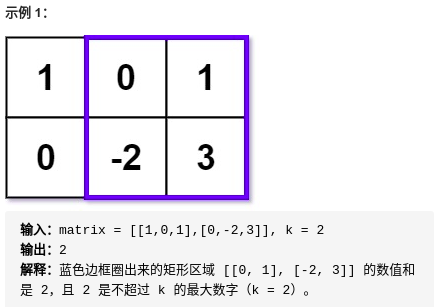
示例 2：
```
输入：matrix = [[2,2,-1]], k = 3
输出：3
``` 

提示：
```
m == matrix.length
n == matrix[i].length
1 <= m, n <= 100
-100 <= matrix[i][j] <= 100
-105 <= k <= 105
```


In [ ]:
class Solution:
    def maxSumSubmatrix(self, matrix: List[List[int]], k: int) -> int:
        